In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mglearn
import sklearn
import plotnine
import warnings

warnings.filterwarnings(action='ignore')

In [2]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [4]:
heart = pd.read_csv("C:/Soongsil/4-2학기/데이터 마이닝/데마 조별/heart.csv")
target = heart.HeartDisease
feature = heart.drop("HeartDisease", axis = 1)

In [5]:
ct = make_column_transformer(
    (StandardScaler(), ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']),
    (OneHotEncoder(sparse = False), ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'])
)

In [6]:
x_train, x_test, y_train, y_test = train_test_split(feature, target,
                                                     train_size=0.7, random_state=0)
ct.fit(x_train, y_train)
x_train_trans = ct.fit_transform(x_train, y_train)
x_test_trans = ct.fit_transform(x_test, y_test)

In [8]:
from sklearn.linear_model import LogisticRegression

In [10]:
logreg = LogisticRegression().fit(x_train_trans, y_train)
logreg.score(x_train_trans, y_train), logreg.score(x_test_trans, y_test)

(0.8769470404984424, 0.8333333333333334)

# 
# 
# 
## K-Fold CV (K-겹 교차검증)
- **장점**
    - 테스트 데이터에 각 샘플이 정확하게 한 번씩 포함
    - 각 샘플은 fold중 하나에 속하며, 각 fold는 한 번씩 테스트 데이터가 됨
    - 교차 검증의 점수와, 평균값을 높이기 위해서는, 데이터셋에 있는 모든 샘플에 대해 모형이 잘 일반화 되어야 함
    - 데이터를 여러 개로 분할하면, 모형이 훈련 데이터에 얼마나 민감한지 파악 가능
    - 분할을 한 번 했을 떄 보다, 데이터를 더 효과적으로 사용 가능

- **단점**
    - 연산 증가
# 

### ```sklearn.model_selection.cross_val_score(모형, 설명변수, 반응변수, groups, cv, scoring)``` : 각 fold별 점수
- ```scoring``` : 평가 지표 ('accuracy' / 'roc_auc' 등)

# 

### ```sklearn.model_selection.cross_validate(모형, 설명변수, 반응변수, groups, cv,  scoring, return_train_score)``` : fold별 검증의 시간과 점수를 반환

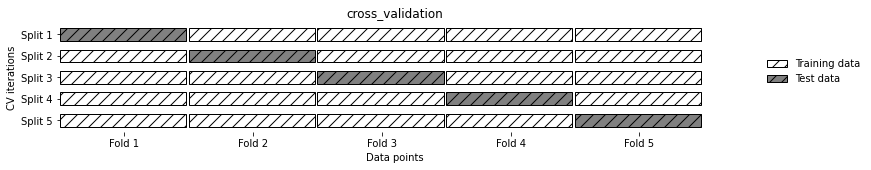

In [12]:
mglearn.plots.plot_cross_validation()

In [13]:
from sklearn.model_selection import cross_val_score

In [17]:
logreg = LogisticRegression(max_iter=1000)
scores = cross_val_score(logreg, x_train_trans, y_train, cv=10)
scores

array([0.86153846, 0.90769231, 0.875     , 0.84375   , 0.796875  ,
       0.9375    , 0.84375   , 0.890625  , 0.921875  , 0.8125    ])

In [18]:
scores.mean()

0.869110576923077

In [19]:
from sklearn.model_selection import cross_validate

In [28]:
res = cross_validate(logreg, x_train_trans, y_train, cv=10)
pd.DataFrame(res)

,fit_time,score_time,test_score
0,0.037662,0.002263,0.861538
1,0.041045,0.000000,0.907692
2,0.028993,0.001029,0.875000
3,0.026950,0.002411,0.843750
4,0.019784,0.000298,0.796875
5,0.021967,0.000950,0.937500
6,0.029326,0.000611,0.843750
7,0.025490,0.000988,0.890625
8,0.022965,0.000000,0.921875
9,0.023178,0.000806,0.812500


In [29]:
pd.DataFrame(res).mean()

fit_time      0.027736
score_time    0.000936
test_score    0.869111
dtype: float64

# 
### 계층별 K-Fold CV (Stratified K-Fold CV)
- 계층 & 반응변수의 클래스를 고려하여, Fold를 생성
- **```sklearn.model_selection.cross_val_score()```**는 분류의 경우 기본적으로 적용

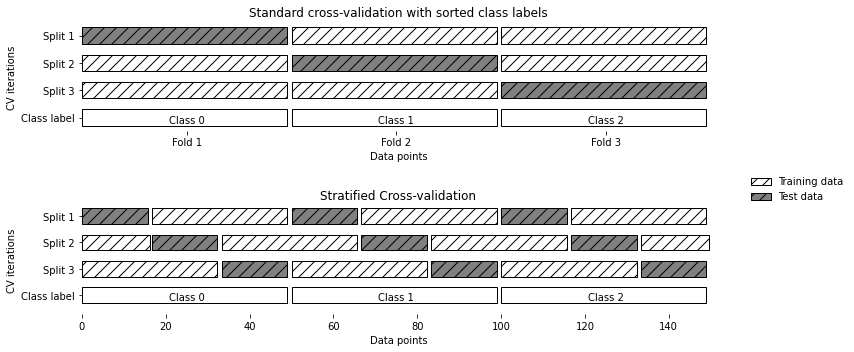

In [30]:
mglearn.plots.plot_stratified_cross_validation()

# 
# 
### 교차 검증 상세 옵션
- ```sklearn.model_selection.cross_val_score()```의 cv에 입력

# 
### ```sklearn.model_selection.KFold(n_splits)```

In [31]:
from sklearn.model_selection import KFold

In [32]:
kfold = KFold(n_splits=5)

In [34]:
cross_val_score(logreg, x_train_trans, y_train, cv=kfold)

array([0.86821705, 0.86046512, 0.875     , 0.875     , 0.875     ])

# 
### LOOCV
- 작은 데이터에 사용 용이
- ```sklearn.model_selection.cross_val_score()```의 cv에 입력

# 
### ```sklearn.model_selection.LeaveOneOut()```

In [36]:
from sklearn.model_selection import LeaveOneOut

In [37]:
loocv = LeaveOneOut()
scores = cross_val_score(logreg, x_train_trans, y_train, cv=loocv)

In [39]:
scores.shape, scores.mean()

((642,), 0.8691588785046729)

# 
### 임의 분할 교차 검증
### ```sklearn.model_selection.ShuffleSplit(test_size, train_size, n_splits)```
- 각 Fold에서 ```train_size```만큼의 포인트로 훈련 세트 생성, ```test_size```만큼 테스트 데이터를 생성, (```n_splits```만큼 반복)
- ```sklearn.model_selection.cross_val_score()```의 cv에 입력


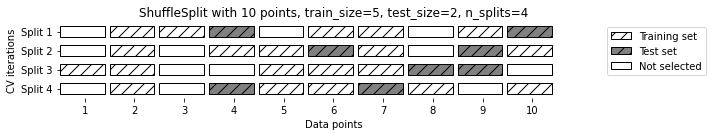

In [41]:
mglearn.plots.plot_shuffle_split()

In [42]:
from sklearn.model_selection import ShuffleSplit

In [43]:
shuffle_split = ShuffleSplit(train_size=0.5, test_size=0.5, n_splits=10)

In [44]:
scores = cross_val_score(logreg, x_train_trans, y_train, cv=shuffle_split)

In [45]:
scores, scores.mean()

(array([0.86292835, 0.85981308, 0.89096573, 0.85358255, 0.86292835,
        0.86604361, 0.82866044, 0.8847352 , 0.8411215 , 0.84735202]),
 0.8598130841121495)

# 
### 그룹별 교차 검증
### ```sklearn.model_selection.GroupKFold(n_splits)```
- ```sklearn.model_selection.cross_val_score()```의 cv에 입력
- ```sklearn.model_selection.cross_val_score()```의 groups에 배열로 그룹 지정

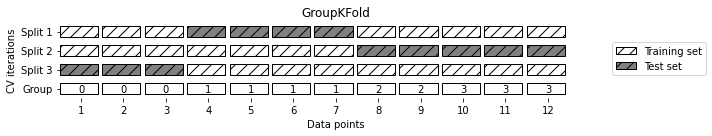

In [50]:
mglearn.plots.plot_group_kfold()

In [52]:
from sklearn.model_selection import GroupKFold
from sklearn.datasets import make_blobs

In [54]:
x, y = make_blobs(n_samples=12, random_state=0)

In [64]:
groups = [0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3]

In [66]:
scores = cross_val_score(logreg, x, y, groups=groups, cv=GroupKFold(n_splits=3))
scores, scores.mean()

(array([0.5       , 0.66666667, 1.        ]), 0.7222222222222222)

# 
### 반복 교차 검증


### 회귀 : ```sklearn.model_selection.RepeatedKFold(n_splits, n_repeats)``` 
### 분류: ```sklearn.model_selection.RepeatedStratifiedKFold(n_splits, n_repeats)``` 
- ```sklearn.model_selection.cross_val_score()```의 cv에 입력
- ```n_repeats``` : 반복 횟수 (default : 10)

In [68]:
from sklearn.model_selection import RepeatedKFold, RepeatedStratifiedKFold

In [72]:
rskfold = RepeatedStratifiedKFold(n_splits=10 , random_state=42)

In [75]:
scores = cross_val_score(logreg, x_train_trans, y_train, cv=rskfold)
scores.shape, scores.mean()

((100,), 0.86821875)

# 
# 
# 
## 그리드 서치 CV

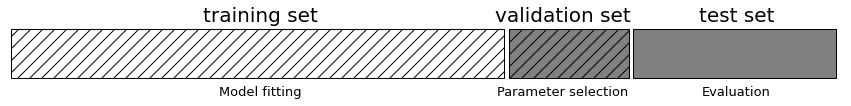

In [77]:
mglearn.plots.plot_threefold_split()

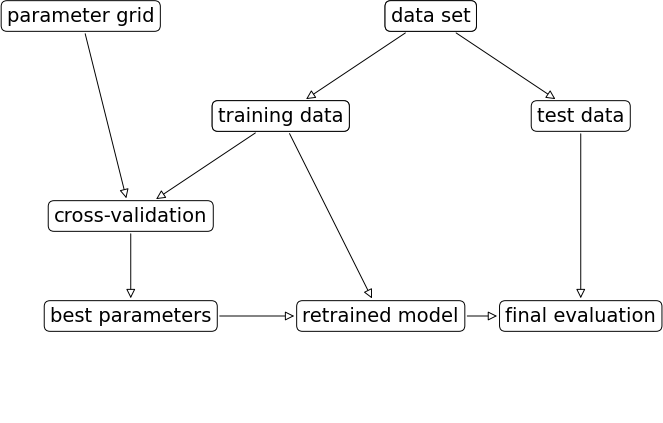

In [90]:
mglearn.plots.plot_grid_search_overview()

### ```sklearn.model_selection.GridSearchCV(estimator, 모형, param_grid, cv, verbose, ...)```

In [92]:
param_grid = {'C' : [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma' : [0.001, 0.01, 0.1, 1, 10, 100]}

In [94]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [97]:
grid_search = GridSearchCV(SVC(), param_grid, cv=5, return_train_score=True). \
    fit(x_train_trans, y_train)

- 최고 성능 모형, 최적 매개변수, 최고 교차 검증 점수

In [109]:
grid_search.best_estimator_, grid_search.best_params_, grid_search.best_score_, 

(SVC(C=100, gamma=0.001), {'C': 100, 'gamma': 0.001}, 0.8722868217054263)

- 전체 훈련 데이터와, 전체 테스트 데이터에 대한 성능

In [110]:
grid_search.score(x_train_trans, y_train), grid_search.score(x_test_trans, y_test)

(0.8800623052959502, 0.8442028985507246)

In [113]:
results = pd.DataFrame(grid_search.cv_results_)
results.shape

(36, 22)

In [114]:
np.transpose(results)

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
mean_fit_time,0.028161,0.027936,0.032909,0.052457,0.03086,0.047018,0.02629,0.028804,0.026638,0.0228,...,0.02203,0.040191,0.05477,0.05101,0.012892,0.019517,0.020112,0.032826,0.04344,0.065001
std_fit_time,0.003183,0.004598,0.017137,0.03548,0.00509,0.009963,0.004876,0.005548,0.004779,0.002855,...,0.004579,0.00346,0.021016,0.008763,0.00219,0.001119,0.004238,0.003301,0.007751,0.005043
mean_score_time,0.020828,0.016081,0.022883,0.019824,0.017595,0.020664,0.015245,0.014761,0.014589,0.013142,...,0.008006,0.018003,0.028656,0.021389,0.005597,0.005444,0.00558,0.017903,0.021742,0.024727
std_score_time,0.006676,0.005576,0.022677,0.005944,0.003217,0.003385,0.002258,0.001883,0.002857,0.00152,...,0.001421,0.004969,0.004414,0.006067,0.001637,0.001492,0.001199,0.000978,0.006114,0.002651
param_C,0.001,0.001,0.001,0.001,0.001,0.001,0.01,0.01,0.01,0.01,...,10,10,10,10,100,100,100,100,100,100
param_gamma,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,...,0.1,1,10,100,0.001,0.01,0.1,1,10,100
params,"{'C': 0.001, 'gamma': 0.001}","{'C': 0.001, 'gamma': 0.01}","{'C': 0.001, 'gamma': 0.1}","{'C': 0.001, 'gamma': 1}","{'C': 0.001, 'gamma': 10}","{'C': 0.001, 'gamma': 100}","{'C': 0.01, 'gamma': 0.001}","{'C': 0.01, 'gamma': 0.01}","{'C': 0.01, 'gamma': 0.1}","{'C': 0.01, 'gamma': 1}",...,"{'C': 10, 'gamma': 0.1}","{'C': 10, 'gamma': 1}","{'C': 10, 'gamma': 10}","{'C': 10, 'gamma': 100}","{'C': 100, 'gamma': 0.001}","{'C': 100, 'gamma': 0.01}","{'C': 100, 'gamma': 0.1}","{'C': 100, 'gamma': 1}","{'C': 100, 'gamma': 10}","{'C': 100, 'gamma': 100}"
split0_test_score,0.534884,0.534884,0.534884,0.534884,0.534884,0.534884,0.534884,0.534884,0.534884,0.534884,...,0.837209,0.682171,0.573643,0.534884,0.860465,0.844961,0.806202,0.682171,0.573643,0.534884
split1_test_score,0.534884,0.534884,0.534884,0.534884,0.534884,0.534884,0.534884,0.534884,0.534884,0.534884,...,0.79845,0.782946,0.542636,0.534884,0.875969,0.860465,0.813953,0.782946,0.542636,0.534884
split2_test_score,0.539062,0.539062,0.539062,0.539062,0.539062,0.539062,0.539062,0.539062,0.539062,0.539062,...,0.914062,0.804688,0.59375,0.539062,0.875,0.882812,0.867188,0.804688,0.59375,0.539062


In [119]:
results.mean_test_score.shape
scores = np.array(results.mean_test_score).reshape(6, 6)

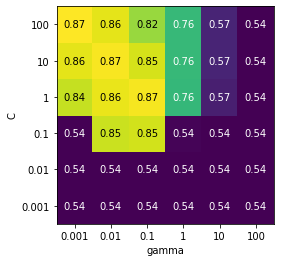

In [121]:
mglearn.tools.heatmap(scores, xlabel='gamma', xticklabels=param_grid['gamma'],
                      ylabel='C', yticklabels=param_grid['C'], cmap='viridis')
plt.show()

# 
# 
#### 그리드 서치 범위의 중요성

In [128]:
param_grid_iinear = {'C': np.linspace(1, 2, 6),
                     'gamma': np.linspace(1, 2, 6)}
param_grid_one_log = {'C': np.linspace(1, 2, 6),
                      'gamma': np.logspace(-3, 2, 6)}
param_grid_range = {'C': np.logspace(-3, 2, 6),
                    'gamma': np.logspace(-7, -2, 6)}

In [129]:
param_grid_iinear, param_grid_one_log, param_grid_range

({'C': array([1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
  'gamma': array([1. , 1.2, 1.4, 1.6, 1.8, 2. ])},
 {'C': array([1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
  'gamma': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])},
 {'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
  'gamma': array([1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02])})

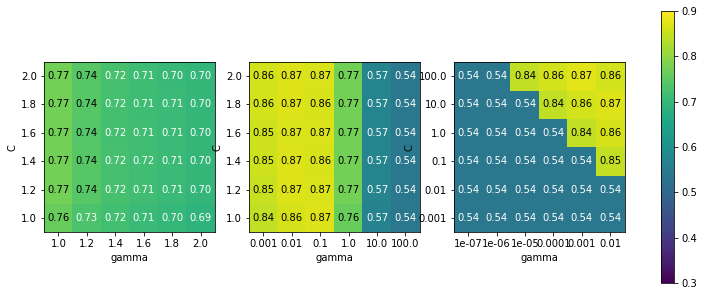

In [131]:
fig, axes = plt.subplots(1, 3, figsize=(13, 5))

for param_grid, ax in zip([param_grid_iinear, param_grid_one_log, param_grid_range], axes):
    grid_search = GridSearchCV(SVC(), param_grid, cv=5)
    grid_search.fit(x_train_trans, y_train)
    scores = grid_search.cv_results_['mean_test_score'].reshape(6, 6)
    
    scores_image = mglearn.tools.heatmap(
        scores, xlabel='gamma', ylabel='C',
        xticklabels=param_grid['gamma'], yticklabels=param_grid['C'],
        cmap='viridis', ax=ax, vmin=0.3, vmax=0.9)
    
plt.colorbar(scores_image, ax=axes.tolist()) 
plt.show()

# 
# 
#### 비대칭 매개변수 그리드 서치

In [132]:
param_grid = [{'kernel' : ['rbf'],
              'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
              {'kernel' : ['linear'],
               'C': [0.001, 0.01, 0.1, 1, 10, 100]}]

In [133]:
param_grid

[{'kernel': ['rbf'],
  'C': [0.001, 0.01, 0.1, 1, 10, 100],
  'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
 {'kernel': ['linear'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}]

In [134]:
grid_search = GridSearchCV(SVC(), param_grid=param_grid, return_train_score=True). \
    fit(x_train_trans, y_train)

In [135]:
grid_search.best_params_, grid_search.best_score_

({'C': 0.1, 'kernel': 'linear'}, 0.8723231589147286)

In [136]:
results = pd.DataFrame(grid_search.cv_results_)
results.T

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
mean_fit_time,0.042721,0.027675,0.047848,0.033211,0.022561,0.042339,0.024408,0.026744,0.025381,0.029782,...,0.024306,0.033704,0.038722,0.05731,0.01343,0.010337,0.011666,0.016897,0.05696,0.682437
std_fit_time,0.0308,0.003484,0.007642,0.01213,0.002927,0.006448,0.001253,0.002838,0.003336,0.004508,...,0.002256,0.005859,0.012048,0.008572,0.001765,0.002597,0.00208,0.001887,0.023665,0.33566
mean_score_time,0.017821,0.015585,0.035421,0.017119,0.012825,0.018857,0.015824,0.015856,0.014305,0.018419,...,0.007589,0.017213,0.018135,0.022209,0.004957,0.003216,0.00199,0.003804,0.002172,0.002562
std_score_time,0.005175,0.004388,0.01111,0.004326,0.001511,0.001564,0.00242,0.002553,0.002619,0.003654,...,0.002665,0.003886,0.004096,0.003538,0.000717,0.001202,0.000015,0.001601,0.001133,0.000783
param_C,0.001,0.001,0.001,0.001,0.001,0.001,0.01,0.01,0.01,0.01,...,100,100,100,100,0.001,0.01,0.1,1,10,100
param_gamma,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,...,0.1,1,10,100,NaN,NaN,NaN,NaN,NaN,NaN
param_kernel,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,...,rbf,rbf,rbf,rbf,linear,linear,linear,linear,linear,linear
params,"{'C': 0.001, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 1, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 10, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 100, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 1, 'kernel': 'rbf'}",...,"{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 100, 'gamma': 1, 'kernel': 'rbf'}","{'C': 100, 'gamma': 10, 'kernel': 'rbf'}","{'C': 100, 'gamma': 100, 'kernel': 'rbf'}","{'C': 0.001, 'kernel': 'linear'}","{'C': 0.01, 'kernel': 'linear'}","{'C': 0.1, 'kernel': 'linear'}","{'C': 1, 'kernel': 'linear'}","{'C': 10, 'kernel': 'linear'}","{'C': 100, 'kernel': 'linear'}"
split0_test_score,0.534884,0.534884,0.534884,0.534884,0.534884,0.534884,0.534884,0.534884,0.534884,0.534884,...,0.806202,0.682171,0.573643,0.534884,0.837209,0.829457,0.837209,0.860465,0.868217,0.868217
split1_test_score,0.534884,0.534884,0.534884,0.534884,0.534884,0.534884,0.534884,0.534884,0.534884,0.534884,...,0.813953,0.782946,0.542636,0.534884,0.844961,0.852713,0.875969,0.868217,0.875969,0.875969


# 
# 
#### 중첩 교차 검증

In [137]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

In [138]:
scores = cross_val_score(GridSearchCV(SVC(), param_grid, cv=5),
                         x_train_trans, y_train, cv=5)

In [139]:
scores, scores.mean()

(array([0.84496124, 0.79844961, 0.8984375 , 0.8671875 , 0.8671875 ]),
 0.8552446705426355)

# 
# 
### 랜덤 서치 CV
- 파라미터 조합이 매우 많거나, 연속형 값을 조정할 때 사용

# 
### ```sklearn.model_selection.RandomizedSearchCV(모형, param_dist, n_iter, cv, ...)```
- ```param_dist``` : 파라미터
- ```n_iter``` : 탐색 횟수

In [140]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.utils.fixes import loguniform

In [141]:
param_dist = [{'kernel' : ['rbf'],
               'C': loguniform(0.001, 100),
               'gamma': loguniform(0.001, 100)},
              {'kernel' : ['linear'],
               'C': loguniform(0.001, 100)}]

In [144]:
rand_search = RandomizedSearchCV(SVC(), param_dist, n_iter=20, random_state=0). \
    fit(x_train_trans, y_train)

In [147]:
rand_search.best_params_, rand_search.best_score_

({'C': 0.5301709347576827, 'kernel': 'linear'}, 0.8691618217054262)

# 
# 
## SH CV (Successive Halving), HalvingGridSearchCV
- 모든 파라미터 조합에 대해 제한적 자원으로 그리드 서치를 실행한 다음, **가장 좋은 후보를 골라서 더 많은 자원을 투여하는 식으로 반복 탐색**

# 
### ```sklearn.model_selection.HalvingGridSearchCV(모형, param_grid, verbose, n_jobs, ...)```

In [150]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

In [151]:
param_grid = [{'kernel': ['rbf'],
               'C': [0.001, 0.01, 0.1, 1, 10, 100],
               'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
              {'kernel': ['linear'],
               'C': [0.001, 0.01, 0.1, 1, 10, 100]}]

In [157]:
halv_search = HalvingGridSearchCV(SVC(), param_grid, verbose=True, random_state=0). \
    fit(x_train_trans, y_train)

n_iterations: 4
n_required_iterations: 4
n_possible_iterations: 4
min_resources_: 23
max_resources_: 642
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 42
n_resources: 23
Fitting 5 folds for each of 42 candidates, totalling 210 fits
----------
iter: 1
n_candidates: 14
n_resources: 69
Fitting 5 folds for each of 14 candidates, totalling 70 fits
----------
iter: 2
n_candidates: 5
n_resources: 207
Fitting 5 folds for each of 5 candidates, totalling 25 fits
----------
iter: 3
n_candidates: 2
n_resources: 621
Fitting 5 folds for each of 2 candidates, totalling 10 fits


1. 42개의 후보를 23개의 샘플로 교차 검증 수행
    - 첫 번쨰 반복에서 사용하는 샘플 개수 : 회귀일 때 cv횟수의 두배 / 분류일 때 클래스 개수를 더 곱함

2. 첫 번재 반복에서 가장 좋은 성능의 14개 후보를 뽑아, 두 번째 반복에서 샘플 개수를 factor배 만큼 늘려서 교차 검증을 수행

3. **전체 샘플 개수보다 작으면서 factor 배만큼 반복할 수 있는 최대 크기일 시, 알고리즘 중지**

In [155]:
halv_search.best_params_, halv_search.best_score_

({'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}, 0.8688040912667191)

In [158]:
halv_search.n_resources_, halv_search.n_candidates_, halv_search.n_iterations_

([23, 69, 207, 621], [42, 14, 5, 2], 4)